In this homework, we will use Credit Card Data from book "Econometric Analysis".

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card).

## Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

C:\anaconda3\envs\ml-zoomcamp\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!wget "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv"

--2022-10-03 20:22:06--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: 'AER_credit_card_data.csv'

     0K .......... .......... .......... .......... .......... 69% 3.97M 0s
    50K .......... .......... .                               100% 45.0M=0.01s

2022-10-03 20:22:06 (5.47 MB/s) - 'AER_credit_card_data.csv' saved [73250/73250]



In [3]:
data = pd.read_csv("AER_credit_card_data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [5]:
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


#### Create the target variable by mapping yes to 1 and no to 0.


***Column card***

In [6]:
data["card"].value_counts()

yes    1023
no      296
Name: card, dtype: int64

In [7]:
data["card"] = np.where(data["card"] == "yes", 1, 0) 

#### Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1.

In [8]:
X = data.drop("card", axis=1)
y = data["card"]

In [9]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape

((1055, 11), (264, 11), (1055,), (264,))

In [10]:
X_train_full.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
710,1,36.83333,3.0000,0.000400,0.000000,yes,no,1,12,1,16
1258,0,35.58333,3.5606,0.109084,323.587500,no,no,0,12,1,0
435,0,25.66667,2.0000,0.004900,7.416667,no,no,0,26,1,13
987,0,25.58333,1.7500,0.000686,0.000000,no,no,0,108,0,0
1286,1,48.66667,6.0000,0.177017,885.085800,yes,no,3,114,1,19


In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((791, 11), (264, 11), (791,), (264,))

In [12]:
X_val.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1081,0,24.00000,2.7811,0.052555,121.63330,no,no,0,3,1,0
479,0,34.25000,1.9440,0.000617,0.00000,no,no,1,54,1,1
317,0,39.75000,2.4200,0.017019,34.15583,yes,no,1,49,1,25
1103,2,25.91667,2.0700,0.000580,0.00000,no,no,0,20,0,7
1179,0,33.75000,2.5000,0.077518,161.16170,yes,no,1,30,1,6


## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

    For each numerical variable, use it as score and compute AUC with the card variable.
    Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenditure'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- reports
- dependents
- active
- **share**

In [13]:
num_cols = X_train.select_dtypes("number").columns
num_cols

Index(['reports', 'age', 'income', 'share', 'expenditure', 'dependents',
       'months', 'majorcards', 'active'],
      dtype='object')

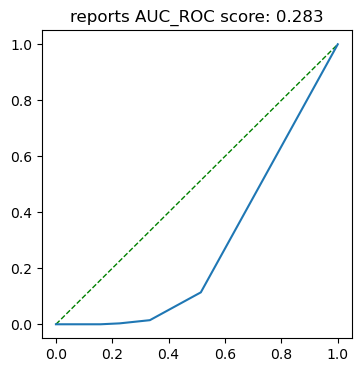

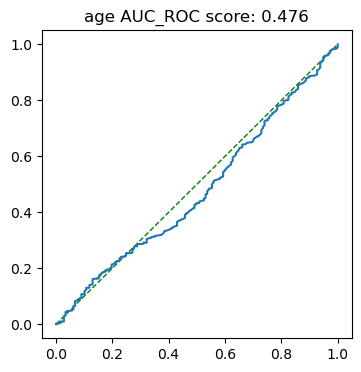

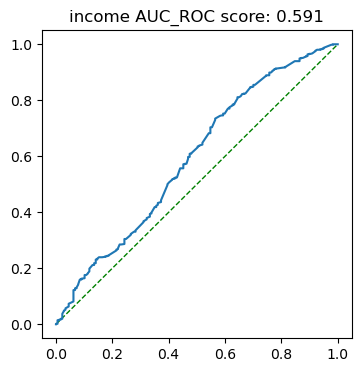

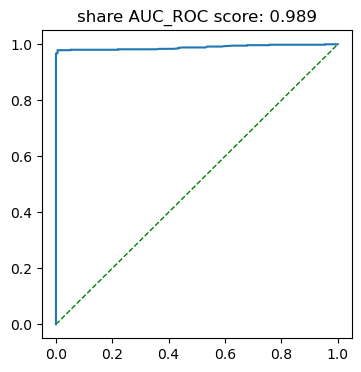

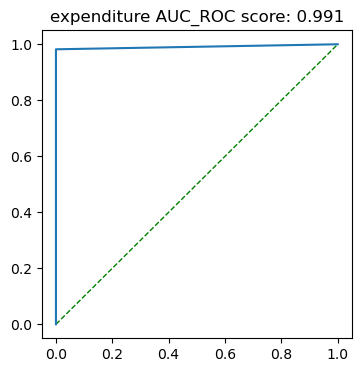

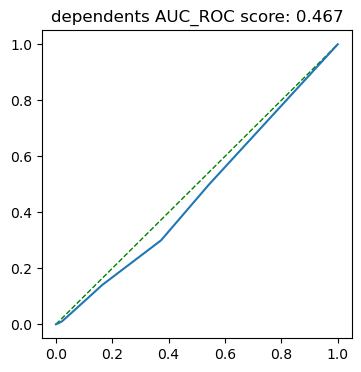

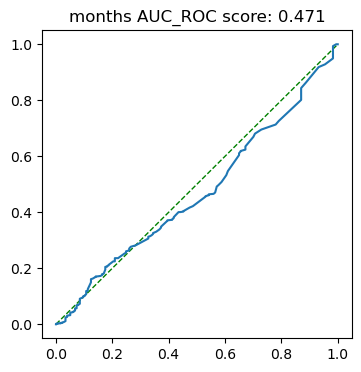

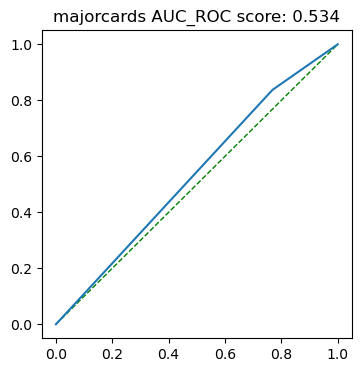

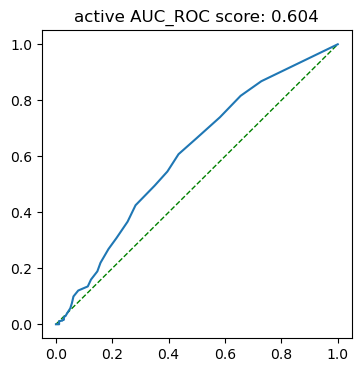

In [14]:
AUC_ROC_score = []

for col in num_cols:
    fpr, tpr, _ = roc_curve(y_train, X_train[col])
    plt.figure(figsize=(4,4),)
    plt.plot([0, 1], [0, 1], color="green", lw=1, linestyle="--")
    plt.plot(fpr,tpr)
    roc_score = (round(roc_auc_score(y_train, X_train[col]),3))
    AUC_ROC_score.append(roc_score)
    plt.title(f"{col} AUC_ROC score: {str(roc_score)}")
    plt.show()

In [15]:
ROC_df = pd.DataFrame({"columns":num_cols, "ROC_score": AUC_ROC_score})
ROC_df

,columns,ROC_score
0,reports,0.283
1,age,0.476
2,income,0.591
3,share,0.989
4,expenditure,0.991
5,dependents,0.467
6,months,0.471
7,majorcards,0.534
8,active,0.604


**Column <u><i>share</i></u> has the highest AUC_ROC Score** 

## Training the model

From now on, use these columns only:

["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]



In [16]:
features = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", 
            "active", "owner", "selfemp"]

### Encoding columns owner, selfemp

***Column owner***

In [17]:
X_train["owner"] = np.where(X_train["owner"] == "yes", 1, 0) 
X_val["owner"] = np.where(X_val["owner"] == "yes", 1, 0) 
X_test["owner"] = np.where(X_test["owner"] == "yes", 1, 0) 

***Column selfemp***

In [18]:
X_train["selfemp"] = np.where(X_train["selfemp"] == "yes", 1, 0) 
X_val["selfemp"] = np.where(X_val["selfemp"] == "yes", 1, 0) 
X_test["selfemp"] = np.where(X_test["selfemp"] == "yes", 1, 0) 

**Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:**

In [19]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
train_dict = X_train[features].to_dict(orient='records')
Xtrain = dv.fit_transform(train_dict)

val_dict = X_val[features].to_dict(orient='records')
Xval = dv.transform(val_dict)

test_dict = X_test[features].to_dict(orient='records')
Xtest = dv.fit_transform(test_dict)


**Train the logistic regression with these parameters**

In [20]:
log_reg = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [21]:
model = log_reg.fit(Xtrain, y_train)
y_train_pred_proba = model.predict_proba(Xtrain)[:,1]

# y_train_pred = np.where(y_train_pred_proba >= 0.5, 1, 0)

ROC_train_score = roc_auc_score(y_train, y_train_pred_proba)
print("Train ROC score: ", round(ROC_train_score,3))

Train ROC score:  0.997


## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.615
- 0.515
- 0.715
- **0.995**

### Validation ROC score 

In [22]:
y_val_pred_proba = model.predict_proba(Xval)[:,1]

# y_val_pred = np.where(y_val_pred_proba >= 0.5, 1, 0)

ROC_val_score = roc_auc_score(y_val, y_val_pred_proba)

print("Validation ROC score: ", round(ROC_val_score,3))

Validation ROC score:  0.995


## Question 3

Now let's compute precision and recall for our model.

    Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
    For each threshold, compute precision and recall
    Plot them

At which threshold precision and recall curves intersect?

- 0.1
- **0.3**
- 0.6
- 0.8

### Precision and Recall scores calculation for various Thresholds

In [23]:
precision_list = []
recall_list = []
thresholds = np.arange(0.0, 1.0, 0.01)
y_val_pred_proba = model.predict_proba(Xval)[:,1]

for t in thresholds:
    
    actual_positive = (y_train == 1)
    actual_negative = (y_train == 0)
    
    predict_positive = (y_train_pred_proba >= t)
    predict_negative = (y_train_pred_proba < t)
    
    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()
    
    fp = (actual_negative & predict_positive).sum()
    fn = (actual_positive & predict_negative).sum()
    
    # Precision
    precision = tp/(tp + fp)
    precision_list.append(precision)
    
    # Recall
    recall = tp/(tp + fn)
    recall_list.append(recall)

### Plot of Precision and Recall vs Thresholds

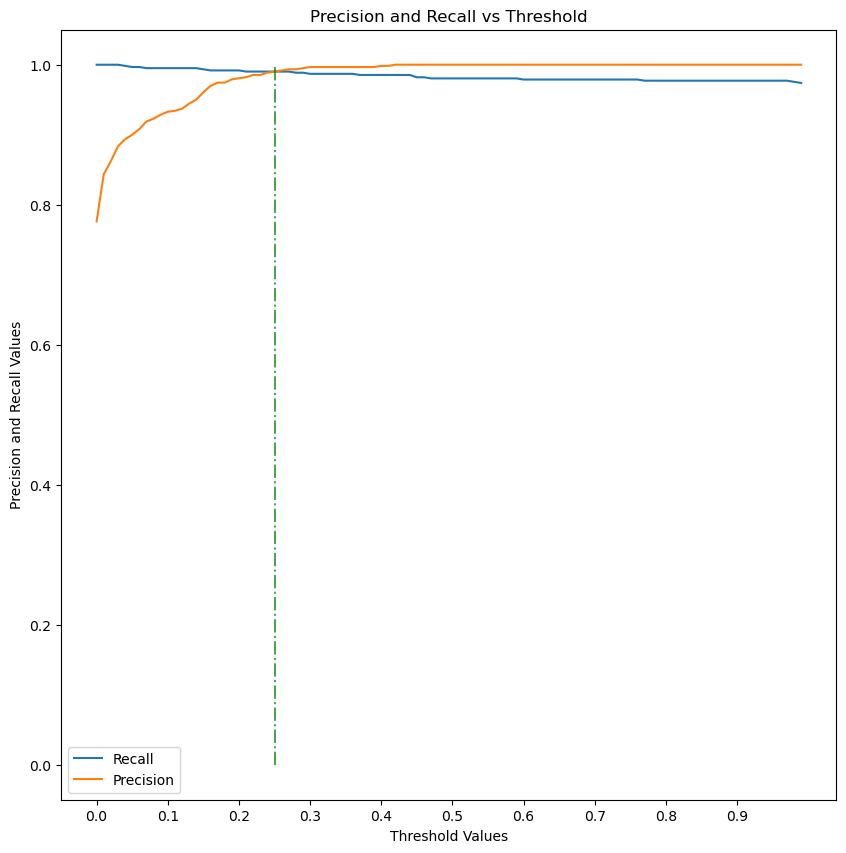

In [24]:
plt.figure(figsize=(10,10))
plt.xlabel("Threshold Values")
plt.ylabel("Precision and Recall Values")
plt.title("Precision and Recall vs Threshold")
plt.xticks(np.arange(0, 1, step=0.1))

sns.lineplot(x=thresholds, y=recall_list, label="Recall")
sns.lineplot(x=thresholds, y=precision_list, label="Precision")
 
plt.vlines(0.25, 0, 1, color='green', linestyle='dashdot', alpha=0.7)
plt.show()

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F1 = 2 * P * R / (P + R)

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.1
- **0.4**
- 0.6
- 0.7

### f1 Calculation

In [25]:
f1 = (2 * np.array(precision_list) * np.array(recall_list)) / (np.array(precision_list) + np.array(recall_list))

In [26]:
# f1 maximum value's index
f1.argmax()

42

In [27]:
# Indices where f1 value is maximum

np.where(f1 == f1.max())

(array([42, 43, 44], dtype=int64),)

### Plot of f1 vs Thresholds

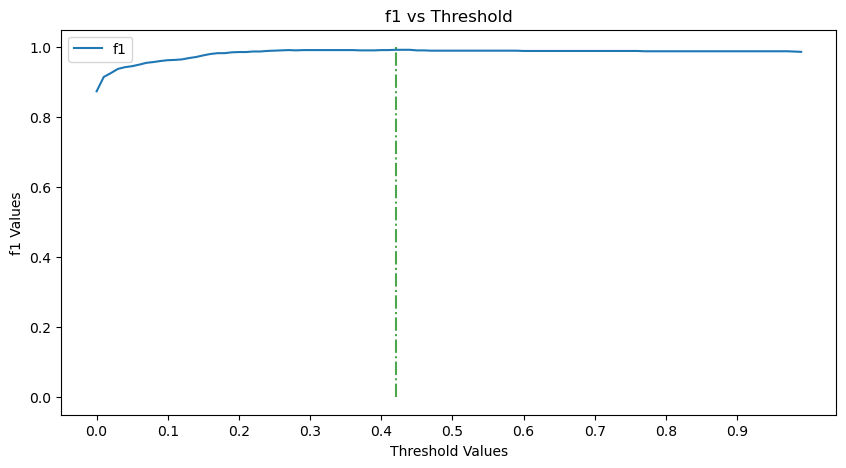

In [28]:
plt.figure(figsize=(10,5))
plt.xlabel("Threshold Values")
plt.ylabel("f1 Values")
plt.title("f1 vs Threshold")
plt.xticks(np.arange(0, 1, step=0.1))

sns.lineplot(x=thresholds, y=f1, label="f1")
 
plt.vlines(0.42, 0, 1, color='green', linestyle='dashdot', alpha=0.7)
plt.show()

f1 maximal value is closest to ***0.4***

## Question 5

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation

How large is standard devidation of the AUC scores across different folds?

- **0.003**
- 0.014
- 0.09
- 0.24

### Function Definitions

In [29]:
def train_model(X_train, y_train, C=1.0):
    
    dv = DictVectorizer(sparse=False)
    
    train_dict = X_train.to_dict(orient='records')
    Xtrain = dv.fit_transform(train_dict)
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(Xtrain, y_train)
    
    return dv, model

In [30]:
def predict(X_val, y_val, dv, model):
    
    val_dict = X_val.to_dict(orient='records')
    Xval = dv.transform(val_dict)
    
    y_val_pred = model.predict_proba(Xval)[:, 1]
    
    AUC_score = roc_auc_score(y_val, y_val_pred)

    return AUC_score    

### KFold definition and train_test split

In [31]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
kfold.get_n_splits()

5

In [32]:
train, test = train_test_split(data, test_size=0.2, random_state=1)

### AUC Scores and their standard deviation for KFold splits = 5

In [33]:
score = []

for train_index, val_index in kfold.split(train):
    
    X_train = train.iloc[train_index].drop("card", axis=1)
    y_train = train.iloc[train_index].card
    
    X_val = train.iloc[val_index].drop("card", axis=1)
    y_val = train.iloc[val_index].card
    
    dv, model = train_model(X_train, y_train, C=1.0)
    score.append(predict(X_val, y_val, dv, model))

In [34]:
print("Standard Deviation of AUC_ROC score using KFold=5 is: ", round(np.array(score).std(),3))

Standard Deviation of AUC_ROC score using KFold=5 is:  0.003


## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

    Iterate over the following C values: [0.01, 0.1, 1, 10]
    Initialize KFold with the same parameters as previously
    Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

- 0.01
- 0.1
- **1**
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

### Function Definitions

In [35]:
def train_model(X_train, y_train, C=1.0):
    
    dv = DictVectorizer(sparse=False)
    
    train_dict = X_train.to_dict(orient='records')
    Xtrain = dv.fit_transform(train_dict)
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(Xtrain, y_train)
    
    return dv, model

In [36]:
def predict(X_val, y_val, dv, model):
    
    val_dict = X_val.to_dict(orient='records')
    Xval = dv.transform(val_dict)
    
    y_val_pred = model.predict_proba(Xval)[:, 1]
    
    AUC_score = roc_auc_score(y_val, y_val_pred)

    return AUC_score    

In [37]:
def kfold_crossvalidation_scores(kfold, train, c):
    
    score = []
    for train_index, val_index in kfold.split(train):
    
        X_train = train.iloc[train_index].drop("card", axis=1)
        y_train = train.iloc[train_index].card

        X_val = train.iloc[val_index].drop("card", axis=1)
        y_val = train.iloc[val_index].card

        dv, model = train_model(X_train, y_train, C=c)
        score.append(predict(X_val, y_val, dv, model))
    
    return score

### KFold definition and train_test split  

In [38]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
kfold.get_n_splits() 

5

In [39]:
train, test = train_test_split(data, test_size=0.2, random_state=1)

### AUC Scores, mean and std. dev for different values of C 

In [40]:
C_values = [0.01, 0.1, 1, 10]
c_AUC_score = dict()

for c in C_values:
    c_AUC_score[c] = kfold_crossvalidation_scores(kfold, train, c)
    print(f"For C: {c}")
    print("KFold Crossvalidation")
    print(f"AUC ROC Scores: {c_AUC_score[c]}")
    print(f"mean: {round(np.array(c_AUC_score[c]).mean(),3)}")
    print(f"std: {round(np.array(c_AUC_score[c]).std(),3)}")
    print()


For C: 0.01
KFold Crossvalidation
AUC ROC Scores: [0.98421926910299, 0.9875, 0.9922266139657444, 0.9954592631032693, 1.0]
mean: 0.992
std: 0.006

For C: 0.1
KFold Crossvalidation
AUC ROC Scores: [0.9900332225913621, 0.991421568627451, 0.9948616600790514, 0.9989621172807472, 1.0]
mean: 0.995
std: 0.004

For C: 1
KFold Crossvalidation
AUC ROC Scores: [0.9941860465116279, 0.9941176470588236, 0.9943346508563901, 0.9996107939802803, 1.0]
mean: 0.996
std: 0.003

For C: 10
KFold Crossvalidation
AUC ROC Scores: [0.9934939091915835, 0.9942401960784313, 0.9945981554677206, 0.9996107939802803, 1.0]
mean: 0.996
std: 0.003



**C = 1** gives the best mean score of 0.996